In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [2]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAHUL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words("English"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data-Preproccesing

In [4]:
news_dataset=pd.read_csv(r"D:\partiise section\news\train.csv")

In [5]:
news_dataset.shape

(20800, 5)

In [6]:
#checking the 5 rows in the dataset
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#checking the nulls in the dataset contains
news_dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#replacing the null values with empty string
news_dataset=news_dataset.fillna('')

In [9]:
#again checking the null vales in the datset wheather the null values are replacing or not
news_dataset.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
#merging the author and new title
news_dataset["content"]=news_dataset["author"]+' '+news_dataset["title"]

In [11]:
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [12]:
#separting the data & labels
x=news_dataset.drop(columns="label",axis=1)
y=news_dataset["label"].values

In [13]:
x.shape

(20800, 5)

In [14]:
y.shape

(20800,)

In [15]:
port_stem=PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words("english")]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [17]:
news_dataset["content"]=news_dataset["content"].apply(stemming)

In [18]:
print(news_dataset["content"])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
#separting the data and label coulumns
X=news_dataset["content"].values
Y=news_dataset["label"].values

In [20]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [21]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [22]:
#converting the text data into numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [23]:
print(X.shape)

(20800, 17128)


In [24]:
#spliting the data into to train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [25]:
x_train.shape

(16640, 17128)

In [26]:
x_test.shape

(4160, 17128)

# APPLYING THE MACHINE LEARNING MODELS

### LogisticRegression

In [27]:
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [28]:
prediction=logistic.predict(x_test)
classfication=classification_report(prediction,y_test)
print(classfication)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2018
           1       0.99      0.97      0.98      2142

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [29]:
#single prediction

x_news=x_test[10]
predictions=logistic.predict(x_news)
print(predictions)
if (predictions[0]==0):
    print("The News is Real")
else:
    print("The News is Fake")

[0]
The News is Real


In [30]:
y_test[10]

0

### PAC

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier()
model.fit(x_train,y_train)

PassiveAggressiveClassifier()

## PAC
the Passive Aggressive Classifier is particularly well-suited for scenarios where the data is noisy, and the underlying distribution may change over time. It's commonly used in text classification tasks such as spam detection, sentiment analysis, and news categorization, but it can also be applied to other types of binary classification problems.

In [32]:
pred=model.predict(x_test)
pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
classfication1=classification_report(pred,y_test)
print(classfication1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [34]:
#single prediction

x_news1=x_test[12]
pred=model.predict(x_news1)
print(pred)
if (pred[0]==0):
    print("The News is Real")
else:
    print("The News is Fake")

[1]
The News is Fake


In [35]:
print(y_test[12])

1


### SVC

In [36]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC()

In [37]:
pred1=svc.predict(x_test)
pred1

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [38]:
classfication2=classification_report(pred1,y_test)
print(classfication2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2055
           1       0.99      0.98      0.99      2105

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [39]:
#single prediction

x_news2=x_test[36]
pred1=svc.predict(x_news2)
print(pred1)
if (pred1[0]==0):
    print("The News is Real")
else:
    print("The News is Fake")

[0]
The News is Real


In [40]:
print(y_test[36])

0


# APPLYING THE DEEP LEARNING THROUGH ANN 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization

In [42]:
ann=Sequential()
ann.add(Dense(32,activation="relu"))
ann.add(Dense(64,activation="relu"))
ann.add(BatchNormalization())
ann.add(Dense(64,activation="relu"))

ann.add(Dense(1,activation="sigmoid"))

In [43]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [44]:
h=ann.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10


520/520 [==============================] - 4s 5ms/step - loss: 0.1268 - accuracy: 0.9528 - val_loss: 0.0720 - val_accuracy: 0.9827
Epoch 2/10
520/520 [==============================] - 2s 4ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 3/10
520/520 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0612 - val_accuracy: 0.9849
Epoch 4/10
520/520 [==============================] - 2s 4ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0820 - val_accuracy: 0.9837
Epoch 5/10
520/520 [==============================] - 2s 3ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0852 - val_accuracy: 0.9849
Epoch 6/10
520/520 [==============================] - 2s 3ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0826 - val_accuracy: 0.9844
Epoch 7/10
520/520 [==============================] - 2s 4ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.1013 - val_accuracy: 0.9832
Epoc

In [45]:
predict1=ann.predict(x_test)

130/130 [==============================] - 0s 848us/step


In [46]:
loss,accuracy=ann.evaluate(x_test,y_test)
print("The loss is:",loss)
print("The accuracy is: ",accuracy)

130/130 [==============================] - 0s 970us/step - loss: 0.0766 - accuracy: 0.9856
The loss is: 0.07657571136951447
The accuracy is:  0.9855769276618958


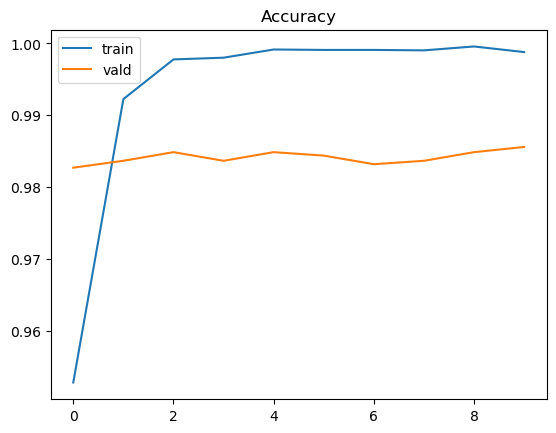

In [47]:
import matplotlib.pyplot as plt

plt.plot(h.history["accuracy"],label="train")
plt.plot(h.history["val_accuracy"],label="vald")
plt.legend()
plt.title("Accuracy")
plt.show()